# Import Libraries

<!-- Cell 1: Import Libraries -->

In [44]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import mlflow
import mlflow.sklearn
import dagshub
import os
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')
from mlflow.models import infer_signature

# Configure DagsHub and MLflow

In [45]:
mlflow.end_run()

In [46]:
import dagshub
dagshub.init(repo_owner='reemfad51', repo_name='student-gpa-prediction', mlflow=True)

import mlflow
with mlflow.start_run():
  mlflow.log_param('parameter name', 'value')
  mlflow.log_metric('metric name', 1)

Repository initialized!

# Load Data

In [47]:
def load_data(file_path):
    """Load and return dataset"""
    df = pd.read_csv(file_path)
    print(f"Dataset loaded: {df.shape}")
    print(f"Columns: {list(df.columns)}")
    return df

# Load data
df = load_data(r'C:\Users\96170\OneDrive - Lebanese University\MachingeLearning_DataScience_InProduction\student-gpa-prediction\data\raw\cleaned_data1.csv')
df.head()

Dataset loaded: (9988, 19)
Columns: ['id', 'email', 'defaultCommunication', 'firstname', 'lastname', 'academicyear', 'address', 'athleticstatus', 'countryoforigin', 'countryofresidence', 'disability', 'dob', 'gender', 'gpa', 'major', 'primarylanguage', 'university', 'dropout', 'study_hours']


,id,email,defaultCommunication,firstname,lastname,academicyear,address,athleticstatus,countryoforigin,countryofresidence,disability,dob,gender,gpa,major,primarylanguage,university,dropout,study_hours
0,1,judith.marks@eduway.com,judith.marks@eduway.com,Judith,Marks,phd,"225 Conrad Park, North Sylvesterbury, NJ 94789",Active,Germany,Saudi Arabia,Autism Spectrum Disorder (ASD),1982-05-04,male,2.13,Chemistry,French,Bernhard Academy,1.0,6.9
1,2,randal.mills@eduway.com,randal.mills@eduway.com,Randal,Mills,graduate,"020 Steuber Glen, South Lulafort, AZ 47935",Active,Germany,Germany,Intellectual Disabilities,1996-01-29,female,2.98,Chemistry,Arabic,South Corkery Academy,0.0,7.6
2,3,donnette.kreiger@eduway.com,donnette.kreiger@eduway.com,Donnette,Kreiger,phd,"Apt. 345 916 Kiehn Brooks, Webershire, NY 07886",Inactive,Saudi Arabia,Jordan,Fetal Alcohol Spectrum Disorders (FASD),1979-06-23,female,2.39,Biology,English,Northern Pennsylvania University,0.0,6.0
3,4,lane.hagenes@eduway.com,lane.hagenes@eduway.com,Lane,Hagenes,phd,"Suite 474 4872 Bo Locks, Reynaldafort, WV 65004",Inactive,Australia,France,Developmental Coordination Disorder (DCD),1999-08-31,male,2.07,Computer Science,German,West Aufderhar University,1.0,6.7
4,5,charise.powlowski@eduway.com,charise.powlowski@eduway.com,Charise,Powlowski,phd,"Suite 581 84432 Kohler Parks, Blickstad, WV 38...",Active,Canada,France,Autism Spectrum Disorder (ASD),1998-04-02,female,2.21,Chemistry,French,Southern Hyatt Academy,1.0,6.6


# Basic Data Exploration

In [48]:
# Display dataset info
print("Dataset Information:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Statistical Summary:")
print("="*50)
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9988 non-null   int64  
 1   email                 9988 non-null   object 
 2   defaultCommunication  9988 non-null   object 
 3   firstname             9988 non-null   object 
 4   lastname              9988 non-null   object 
 5   academicyear          9988 non-null   object 
 6   address               9988 non-null   object 
 7   athleticstatus        9988 non-null   object 
 8   countryoforigin       9988 non-null   object 
 9   countryofresidence    9988 non-null   object 
 10  disability            9988 non-null   object 
 11  dob                   9988 non-null   object 
 12  gender                9988 non-null   object 
 13  gpa                   9988 non-null   float64
 14  major                 9988 non-null   object 
 15  

,id,gpa,dropout,study_hours
count,9988.000000,9988.000000,9988.000000,9988.000000
mean,4994.500000,2.709696,0.113136,7.059471
std,2883.431578,0.409835,0.316775,0.885812
min,1.000000,2.000000,0.000000,4.000000
25%,2497.750000,2.360000,0.000000,6.400000
50%,4994.500000,2.700000,0.000000,7.100000
75%,7491.250000,3.070000,0.000000,7.700000
max,9988.000000,3.410000,1.000000,9.000000


# Check for Missing Values

In [49]:
# Check missing values
print("Missing Values:")
print("="*50)
missing = df.isnull().sum()
print(missing[missing > 0])

if missing.sum() == 0:
    print("No missing values found!")

Missing Values:
Series([], dtype: int64)
No missing values found!


In [50]:
missing = df.isnull().sum()
missing

id                      0
email                   0
defaultCommunication    0
firstname               0
lastname                0
academicyear            0
address                 0
athleticstatus          0
countryoforigin         0
countryofresidence      0
disability              0
dob                     0
gender                  0
gpa                     0
major                   0
primarylanguage         0
university              0
dropout                 0
study_hours             0
dtype: int64

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9988 entries, 0 to 9987
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9988 non-null   int64  
 1   email                 9988 non-null   object 
 2   defaultCommunication  9988 non-null   object 
 3   firstname             9988 non-null   object 
 4   lastname              9988 non-null   object 
 5   academicyear          9988 non-null   object 
 6   address               9988 non-null   object 
 7   athleticstatus        9988 non-null   object 
 8   countryoforigin       9988 non-null   object 
 9   countryofresidence    9988 non-null   object 
 10  disability            9988 non-null   object 
 11  dob                   9988 non-null   object 
 12  gender                9988 non-null   object 
 13  gpa                   9988 non-null   float64
 14  major                 9988 non-null   object 
 15  primarylanguage      

In [52]:
unique_elements=df['countryoforigin'].unique()
print(unique_elements)

['Germany' 'Saudi Arabia' 'Australia' 'Canada' 'Jordan' 'Iraq' 'France'
 'United Arab Emirates']


In [53]:
unique_elements=df['academicyear'].unique()
print(unique_elements)

['phd' 'graduate' 'sophomore' 'freshman' 'junior' 'senior']


In [54]:
unique_elements=df['athleticstatus'].unique()
print(unique_elements)

['Active' 'Inactive']


In [55]:
unique_elements=df['countryofresidence'].unique()
print(unique_elements)

['Saudi Arabia' 'Germany' 'Jordan' 'France' 'Canada'
 'United Arab Emirates' 'Iraq' 'Australia']


In [56]:
unique_elements=df['major'].unique()
print(unique_elements)

['Chemistry' 'Biology' 'Computer Science' 'Physics']


In [57]:
unique_elements=df['primarylanguage'].unique()
print(unique_elements)

['French' 'Arabic' 'English' 'German' 'Spanish']


In [58]:
unique_elements=df['university'].unique()
# print(unique_elements for i in unique_elements)
for element in unique_elements:
    print(element)


Bernhard Academy
South Corkery Academy
Northern Pennsylvania University
West Aufderhar University
Southern Hyatt Academy
South Towne University
Hauck Institute
Western Cassin
South Virginia Academy
Roberts Institute
Streich University
North Wisconsin College
Northern Nebraska University
King Academy
Zboncak College
North Hamill University
West Mante College
Southern Maryland Academy
The Barrows
Prohaska Institute
West Bosco
North Schuppe College
The Pollich
Southern Hintz College
South Murphy Institute
East Arkansas Institute
Southern Medhurst
Barrows College
The Alaska Academy
Nikolaus Academy
Eastern Delaware Academy
Eastern Cronin
Western New Mexico Institute
East Parisian Institute
East Muller
Ebert Institute
West Hermiston
Eastern O'Kon
The Ankunding
Southern Prohaska
Little Institute
Southern Aufderhar
North Kentucky College
Eastern Schoen University
South Harber
West Emmerich
Ortiz Institute
Southern Marquardt
East Michigan College
Western Boyle
Southern Miller College
Rice Inst

# Preprocess Data

In [59]:
# Drop unnecessary features
columns_to_drop = ['id', 'firstname', 'lastname', 'email', 'defaultCommunication', 'address']
df = df.drop(columns=columns_to_drop, errors='ignore')

In [60]:
def preprocess_data(df):
    """
    Basic preprocessing for GPA prediction
    """
    df_clean = df.copy()
    
    # Handle missing values in target
    df_clean = df_clean.dropna(subset=['gpa'])
    
    # Separate features and target
    target_col = 'gpa'
    X = df_clean.drop(columns=[target_col])
    y = df_clean[target_col]
    
    # Encode categorical variables
    label_encoders = {}
    categorical_cols = X.select_dtypes(include=['object']).columns
    
    for col in categorical_cols:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col].astype(str))
        label_encoders[col] = le
        print(f"Encoded column: {col}")
    
    # Fill remaining missing values with median
    X = X.fillna(X.median(numeric_only=True))
    
    print(f"\nFeatures: {X.shape[1]}")
    print(f"Samples: {len(X)}")
    print(f"Target range: [{y.min():.2f}, {y.max():.2f}]")
    
    return X, y, label_encoders

# Preprocess data
X, y, encoders = preprocess_data(df)

Encoded column: academicyear
Encoded column: athleticstatus
Encoded column: countryoforigin
Encoded column: countryofresidence
Encoded column: disability
Encoded column: dob
Encoded column: gender
Encoded column: major
Encoded column: primarylanguage
Encoded column: university

Features: 12
Samples: 9988
Target range: [2.00, 3.41]


In [61]:
# Check what encoders you have
print("Categorical columns encoded:")
for col, encoder in encoders.items():
    print(f"  {col}: {len(encoder.classes_)} categories")
    print(f"    Classes: {encoder.classes_[:5]}...")  # Show first 5

Categorical columns encoded:
  academicyear: 6 categories
    Classes: ['freshman' 'graduate' 'junior' 'phd' 'senior']...
  athleticstatus: 2 categories
    Classes: ['Active' 'Inactive']...
  countryoforigin: 8 categories
    Classes: ['Australia' 'Canada' 'France' 'Germany' 'Iraq']...
  countryofresidence: 8 categories
    Classes: ['Australia' 'Canada' 'France' 'Germany' 'Iraq']...
  disability: 21 categories
    Classes: ['Anxiety Disorders' 'Attention-Deficit/Hyperactivity Disorder (ADHD)'
 'Auditory Processing Disorders' 'Autism Spectrum Disorder (ASD)'
 'Chronic Health Conditions']...
  dob: 7583 categories
    Classes: ['1960-09-23' '1960-09-26' '1960-09-27' '1960-09-28' '1960-09-30']...
  gender: 2 categories
    Classes: ['female' 'male']...
  major: 4 categories
    Classes: ['Biology' 'Chemistry' 'Computer Science' 'Physics']...
  primarylanguage: 5 categories
    Classes: ['Arabic' 'English' 'French' 'German' 'Spanish']...
  university: 6967 categories
    Classes: ['Abbot

# Split Data

In [62]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")
print(f"Feature columns: {list(X.columns)}")

Training set size: 7990
Test set size: 1998
Feature columns: ['academicyear', 'athleticstatus', 'countryoforigin', 'countryofresidence', 'disability', 'dob', 'gender', 'major', 'primarylanguage', 'university', 'dropout', 'study_hours']


 # Define Training Function

In [63]:
params = {
    'n_estimators': 200,
    'max_depth': 15,
    'min_samples_split': 4,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'random_state': 42,
    'n_jobs': -1
}

def train_model(X_train, y_train, params):
    """Train Random Forest model"""
    model = RandomForestRegressor(**params)
    model.fit(X_train, y_train)
    return model

model=train_model(X_train=X_train,y_train=y_train,params=params)

 # Define Evaluation Function

In [64]:
def evaluate_model(model, X_test, y_test):
    """Evaluate model performance"""
    predictions = model.predict(X_test)
    
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    
    metrics = {
        'mse': mse,
        'rmse': rmse,
        'mae': mae,
        'r2_score': r2
    }
    
    return metrics, predictions

# Train and Log Model with MLflow

In [65]:
# Cell: Train Multiple Models for Comparison

models_to_test = {
    'baseline': {
        'n_estimators': 100,
        'max_depth': 10,
        'min_samples_split': 5,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'random_state': 42,
        'n_jobs': -1
    },
    'improved': {
        'n_estimators': 200,
        'max_depth': 15,
        'min_samples_split': 4,
        'min_samples_leaf': 2,
        'max_features': 'sqrt',
        'random_state': 42,
        'n_jobs': -1
    },
    'strong': {
        'n_estimators': 300,
        'max_depth': 20,
        'min_samples_split': 3,
        'min_samples_leaf': 1,
        'max_features': 'sqrt',
        'random_state': 42,
        'n_jobs': -1,
        'oob_score': True
    }
}

results = {}

for model_name, params in models_to_test.items():
    print(f"\n{'='*60}")
    print(f"Training {model_name} model...")
    print(f"{'='*60}")
    
    with mlflow.start_run(run_name=f"rf_{model_name}"):
        # Log parameters
        mlflow.log_params(params)
        
        # Train
        model = train_model(X_train, y_train, params)
        
        # Evaluate
        metrics, predictions = evaluate_model(model, X_test, y_test)
        
        # Log metrics
        # mlflow.log_metrics(metrics)
        #logging model with the use of inputs and outputs
        signature = infer_signature(X_train, model.predict(X_train))

        # Log model WITH signature
        mlflow.sklearn.log_model(
            model, 
            "model",
            signature=signature,
            registered_model_name="gpa_predictor",
            input_example=X_train.iloc[:5]  # Log sample input for reference
        )

        
        # Log model
        # mlflow.sklearn.log_model(
        #     model, 
        #     "model",
        #     registered_model_name=f"gpa_predictor_{model_name}"
        # )
        
        results[model_name] = metrics
        
        print(f"Results for {model_name}:")
        for metric, value in metrics.items():
            print(f"  {metric.upper()}: {value:.4f}")

# Compare results
print(f"\n{'='*60}")
print("Model Comparison:")
print(f"{'='*60}")
comparison_df = pd.DataFrame(results).T
print(comparison_df.sort_values('r2_score', ascending=False))


Training baseline model...


Registered model 'gpa_predictor' already exists. Creating a new version of this model...
2026/01/28 00:14:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: gpa_predictor, version 8
Created version '8' of model 'gpa_predictor'.


Results for baseline:
  MSE: 0.0714
  RMSE: 0.2673
  MAE: 0.2140
  R2_SCORE: 0.5732

Training improved model...


Registered model 'gpa_predictor' already exists. Creating a new version of this model...
2026/01/28 00:15:52 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: gpa_predictor, version 9
Created version '9' of model 'gpa_predictor'.


Results for improved:
  MSE: 0.0712
  RMSE: 0.2669
  MAE: 0.2120
  R2_SCORE: 0.5745

Training strong model...


Registered model 'gpa_predictor' already exists. Creating a new version of this model...
2026/01/28 00:18:32 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: gpa_predictor, version 10
Created version '10' of model 'gpa_predictor'.


Results for strong:
  MSE: 0.0715
  RMSE: 0.2674
  MAE: 0.2126
  R2_SCORE: 0.5727

Model Comparison:
               mse      rmse       mae  r2_score
improved  0.071234  0.266898  0.212048  0.574474
baseline  0.071442  0.267287  0.213986  0.573232
strong    0.071528  0.267447  0.212594  0.572720


In [66]:
import pickle

# Save label encoders for deployment
with open(r'C:\Users\96170\OneDrive - Lebanese University\MachingeLearning_DataScience_InProduction\student-gpa-prediction\models\label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

print("✅ Label encoders saved to models/label_encoders.pkl")

# Also log to MLflow
mlflow.log_artifact(r'C:\Users\96170\OneDrive - Lebanese University\MachingeLearning_DataScience_InProduction\student-gpa-prediction\models\label_encoders.pkl', 'preprocessors')

✅ Label encoders saved to models/label_encoders.pkl


# Feature Importance Analysis

In [67]:
# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print("="*50)
print(feature_importance.head(10))

Top 10 Most Important Features:
               feature  importance
11         study_hours    0.439510
10             dropout    0.167001
5                  dob    0.080065
9           university    0.078779
4           disability    0.054531
2      countryoforigin    0.037766
3   countryofresidence    0.036484
0         academicyear    0.030749
8      primarylanguage    0.028789
7                major    0.023679


# Save Processed Data for DVC

In [68]:
# Save preprocessed data for DVC tracking
train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

os.makedirs('data/processed', exist_ok=True)
train_data.to_csv('data/processed/train.csv', index=False)
test_data.to_csv('data/processed/test.csv', index=False)

print("Processed data saved to:")
print("  - data/processed/train.csv")
print("  - data/processed/test.csv")

Processed data saved to:
  - data/processed/train.csv
  - data/processed/test.csv


# Predictions Analysis

In [69]:
# Create predictions dataframe
results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': predictions,
    'Error': y_test.values - predictions
})

print("Sample Predictions:")
print("="*50)
print(results.head(10))

print("\n" + "="*50)
print("Prediction Error Statistics:")
print("="*50)
print(results['Error'].describe())

Sample Predictions:
   Actual  Predicted     Error
0    2.79   2.508824  0.281176
1    2.50   2.721171 -0.221171
2    2.13   2.563917 -0.433917
3    2.86   2.658342  0.201658
4    3.02   2.642110  0.377890
5    3.22   3.100907  0.119093
6    2.22   2.164913  0.055087
7    2.48   2.804321 -0.324321
8    2.18   2.179632  0.000368
9    2.63   2.568077  0.061923

Prediction Error Statistics:
count    1998.000000
mean        0.008063
std         0.267392
min        -1.054863
25%        -0.163919
50%         0.017258
75%         0.185847
max         0.980637
Name: Error, dtype: float64


#  Visualize Predictions

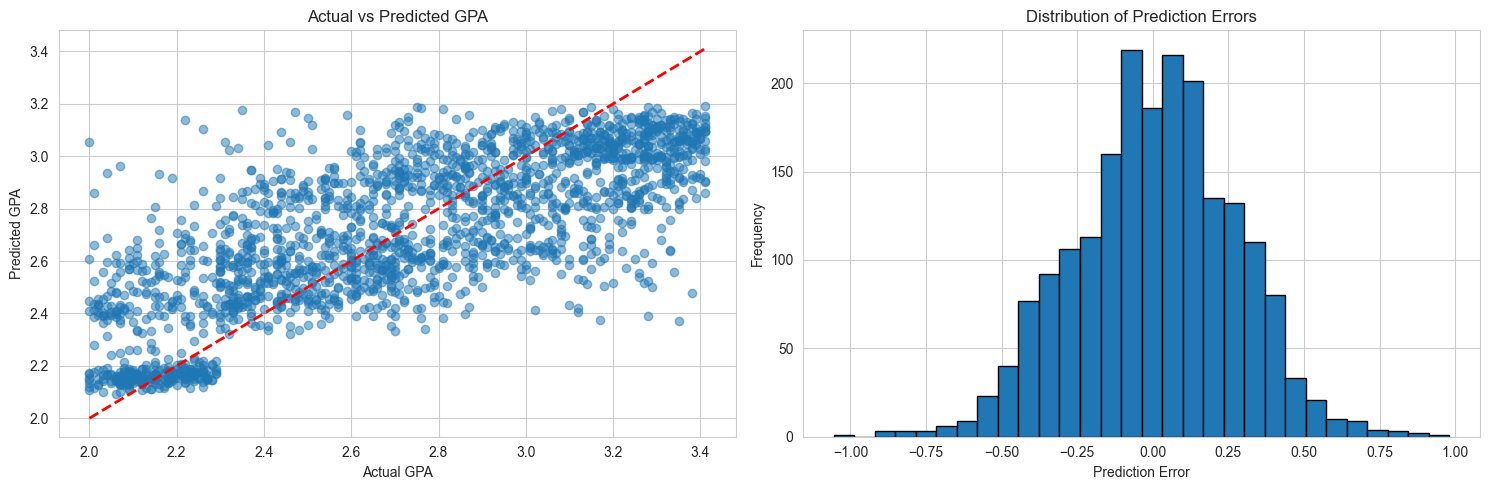

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Actual vs Predicted
axes[0].scatter(y_test, predictions, alpha=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual GPA')
axes[0].set_ylabel('Predicted GPA')
axes[0].set_title('Actual vs Predicted GPA')

# Error distribution
axes[1].hist(results['Error'], bins=30, edgecolor='black')
axes[1].set_xlabel('Prediction Error')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Prediction Errors')

plt.tight_layout()
plt.show()